In [1]:
import pickle
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns

c:\users\kasia\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
sns.set_style("whitegrid")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (6, 2.5)

pal = sns.color_palette("Set2", 8)

In [33]:
df_discipline = pd.DataFrame()

for file_path in os.listdir(f'./data'):
    if 'GLO' not in file_path:
        continue
    print(file_path)
    df = pd.read_csv(f'./data/{file_path}')

    df['data_godzina'] = pd.to_datetime(df['data_godzina'])
    df['year_month'] = df['data_godzina'].dt.strftime('%Y-%m')
    year_months = df['year_month'].unique()
    
    for y_m in tqdm(year_months):
        df_m = df[(df['year_month'] == y_m) & (df['Glos'] != 'Nieobecny')]
        g = df_m.groupby(['Klub', 'vote_id', 'Glos'], as_index=False)['Nrleg'].nunique()

        unique_parties = df_m['Klub'].unique()
        for party in unique_parties:
            g_p = g[g['Klub'] == party]
            unique_vote_ids = g_p['vote_id'].unique()
            for vote_id in unique_vote_ids:
                g_pv = g_p[g_p['vote_id'] == vote_id]
                dt = df[df['vote_id'] == vote_id]['data_godzina'].iloc[0]
                # percent of deputies that voted like the majority in their party (discipline)
                discipline_v = g_pv['Nrleg'].max() / g_pv['Nrleg'].sum()
                df_res = pd.DataFrame({'k': [vote_id // 10**6],
                                       'year_month': [y_m],
                                       'club' : [party],
                                       'vote_id': [vote_id],
                                       'data_godzina': [dt],
                                       'discipline': [discipline_v]
                                      })
                df_discipline = pd.concat([df_discipline, df_res], ignore_index=True)

GLO10k1p10p_i.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.14it/s]


GLO3k1p119p_i.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [14:03<00:00, 18.34s/it]


GLO4k1p109p_i.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [38:54<00:00, 49.68s/it]


GLO5k1p48p_i.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [04:51<00:00, 12.14s/it]


GLO6k1p100p_i.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [13:55<00:00, 18.17s/it]


GLO7k1p102p_i.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [09:35<00:00, 11.99s/it]


GLO8k1p86p_i.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [15:45<00:00, 21.01s/it]


GLO9k1p81p_i.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [23:57<00:00, 31.25s/it]


In [3]:
df = pd.read_csv(f'./data/GLO6k1p100p_i.csv')

In [4]:
df

,vote_id,data_godzina,Nrleg,NazwiskoImie,Glos,Klub
0,6001002,2007-11-05 19:20:54,1,Abramowicz Adam,Za,PiS
1,6001002,2007-11-05 19:20:54,2,Adamczyk Andrzej,Za,PiS
2,6001002,2007-11-05 19:20:54,3,Ajchler Romuald,Za,LiD
3,6001002,2007-11-05 19:20:54,4,Aleksandrzak Leszek,Za,LiD
4,6001002,2007-11-05 19:20:54,5,Andzel Waldemar,Za,PiS
...,...,...,...,...,...,...
3860560,6100129,2011-09-16 21:24:42,455,Żaczek Jarosław,Za,PiS
3860561,6100129,2011-09-16 21:24:42,456,Żalek Jacek,Nieobecny,PO
3860562,6100129,2011-09-16 21:24:42,457,Żelichowski Stanisław,Za,PSL
3860563,6100129,2011-09-16 21:24:42,458,Żmijan Stanisław,Za,PO


In [5]:
df_discipline['year'] = df_discipline['data_godzina'].dt.strftime('%Y')

NameError: name 'df_discipline' is not defined

In [35]:
df_discipline = df_discipline.sort_values('data_godzina')

In [37]:
df_discipline

,k,year_month,club,vote_id,data_godzina,discipline,year
2558,3,1997-10,AWS,3001001,1997-10-20 12:51:54,0.995000,1997
2591,3,1997-10,SLD,3001001,1997-10-20 12:51:54,0.974684,1997
2624,3,1997-10,UW,3001001,1997-10-20 12:51:54,1.000000,1997
2657,3,1997-10,PSL,3001001,1997-10-20 12:51:54,1.000000,1997
2690,3,1997-10,ROP,3001001,1997-10-20 12:51:54,0.833333,1997
...,...,...,...,...,...,...,...
2491,10,2024-04,Kukiz15,10010026,2024-04-26 11:30:28,1.000000,2024
2359,10,2024-04,Polska2050-TD,10010026,2024-04-26 11:30:28,1.000000,2024
2227,10,2024-04,PSL-TD,10010026,2024-04-26 11:30:28,1.000000,2024
2293,10,2024-04,Konfederacja,10010026,2024-04-26 11:30:28,0.823529,2024


In [36]:
df_discipline.to_csv('df_discipline.csv', index=False)

In [25]:
df_discipline = pd.read_csv('df_discipline.csv')

In [26]:
df_discipline = pd.read_csv('df_discipline.csv')
df_discipline['year_month'] = pd.to_datetime(df_discipline['year_month'], format='%Y-%m')
df_discipline.dtypes

k                        int64
year_month      datetime64[ns]
club                    object
vote_id                  int64
data_godzina            object
discipline             float64
year                     int64
dtype: object

In [8]:
df_discipline[(df_discipline['k'] == 6)]

,k,year_month,club,vote_id,data_godzina,discipline,year
311143,6,2007-11-01,PSL,6001002,2007-11-05 19:20:54,1.000000,2007
311144,6,2007-11-01,PiS,6001002,2007-11-05 19:20:54,1.000000,2007
311145,6,2007-11-01,niez.,6001002,2007-11-05 19:20:54,1.000000,2007
311146,6,2007-11-01,PO,6001002,2007-11-05 19:20:54,0.995146,2007
311147,6,2007-11-01,LiD,6001002,2007-11-05 19:20:54,0.980000,2007
...,...,...,...,...,...,...,...
374884,6,2011-09-01,PSL,6100129,2011-09-16 21:24:42,1.000000,2011
374885,6,2011-09-01,PO,6100129,2011-09-16 21:24:42,0.983607,2011
374886,6,2011-09-01,PiS,6100129,2011-09-16 21:24:42,0.909910,2011
374887,6,2011-09-01,SDPL,6100129,2011-09-16 21:24:42,0.500000,2011


In [39]:
df_discipline[(df_discipline['k'] == 6) & (df_discipline['club'] == 'PiS')]

,k,year_month,club,vote_id,data_godzina,discipline,year
313701,6,2007-11,PiS,6001002,2007-11-05 19:20:54,1.000000,2007
313702,6,2007-11,PiS,6001003,2007-11-06 14:15:06,1.000000,2007
313703,6,2007-11,PiS,6001004,2007-11-06 15:13:47,0.993827,2007
313704,6,2007-11,PiS,6001005,2007-11-06 15:15:03,0.975309,2007
313705,6,2007-11,PiS,6001006,2007-11-06 15:16:31,0.993827,2007
...,...,...,...,...,...,...,...
376668,6,2011-09,PiS,6100125,2011-09-16 21:16:19,0.966942,2011
376669,6,2011-09,PiS,6100126,2011-09-16 21:17:18,1.000000,2011
376670,6,2011-09,PiS,6100127,2011-09-16 21:22:27,1.000000,2011
376671,6,2011-09,PiS,6100128,2011-09-16 21:23:47,0.963964,2011


In [43]:
df_median.dtypes

k               int64
year_month     object
club           object
discipline    float64
dtype: object

### PiS

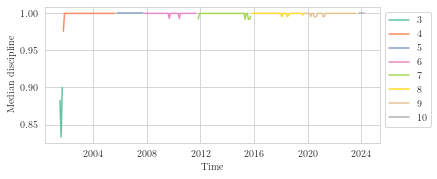

In [49]:
df_median = df_discipline.groupby(['k', 'year_month', 'club'], as_index=False)['discipline'].median()
df_median['year_month'] = pd.to_datetime(df_median['year_month'], format='%Y-%m')

sns.lineplot(df_median[df_median['club'] == 'PiS'], x="year_month", y="discipline", hue='k', palette=pal)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Median discipline')
plt.show()

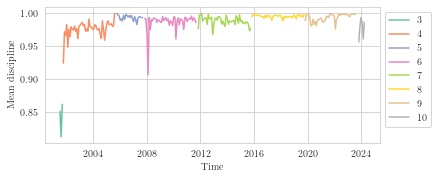

In [50]:
df_mean = df_discipline.groupby(['k', 'year_month', 'club'], as_index=False)['discipline'].mean()
df_mean['year_month'] = pd.to_datetime(df_mean['year_month'], format='%Y-%m')

sns.lineplot(df_mean[df_mean['club'] == 'PiS'], x="year_month", y="discipline", hue='k', palette=pal)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Mean discipline')
plt.show()

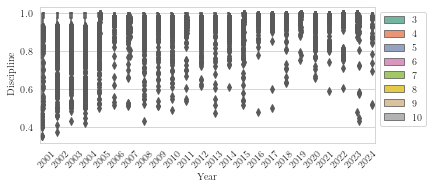

In [55]:
sns.boxplot(x="year", y="discipline",
            data=df_discipline[df_discipline['club'] == 'PiS'].sort_values('year'), hue='k', palette=pal)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Discipline')
plt.show()

### All clubs

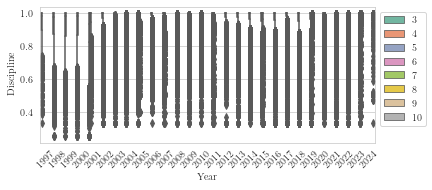

In [57]:
sns.boxplot(x="year", y="discipline", hue='k', palette=pal,
            data=df_discipline)
plt.xlabel('Year')
plt.ylabel('Discipline')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('images/measures_in_time/discipline_boxplots.pdf', bbox_inches='tight')
plt.show()

# Disciplined votes

In [11]:
def discipline_votes(df):
    return len(df[df['discipline'] == 1]) / len(df)

In [12]:
df_discipline_votings = df_discipline.groupby(['k', 'year', 'year_month', 'club'], as_index=False).apply(discipline_votes)
df_discipline_votings = df_discipline_votings.rename(columns={None: 'discipline_votings'})
df_discipline_votings['year_month'] = pd.to_datetime(df_discipline_votings['year_month'], format='%Y-%m')

In [13]:
df_discipline_votings.dtypes

k                              int64
year                           int64
year_month            datetime64[ns]
club                          object
discipline_votings           float64
dtype: object

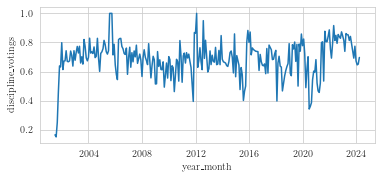

In [66]:
# PiS
sns.lineplot(data=df_discipline_votings[df_discipline_votings['club'] == 'PiS'].sort_values('year_month'),
            x='year_month', y='discipline_votings')
plt.show()

In [27]:
df_gov = pd.read_csv('gov_coalisions.csv')

def string_to_list(s):
    return [el.strip() for el in s.split(",")]

df_gov['gov'] = df_gov['gov'].map(string_to_list)
df_gov.head()

,k,period,gov,opp,Unnamed: 4
0,3,1997_10,"[AWS, UW]","ROP, SLD, PSL",NaN
1,3,1997_11,"[AWS, UW]",NaN,NaN
2,3,1997_12,"[AWS, UW]",NaN,NaN
3,3,1998_01,"[AWS, UW]",NaN,NaN
4,3,1998_02,"[AWS, UW]",NaN,NaN


In [28]:
df_gov = df_gov[['k', 'period', 'gov']]

In [16]:
df_discipline_votings

,k,year,year_month,club,discipline_votings
0,3,1997,1997-10-01,AWS,0.000000
1,3,1997,1997-10-01,MN,1.000000
2,3,1997,1997-10-01,PSL,0.181818
3,3,1997,1997-10-01,ROP,0.424242
4,3,1997,1997-10-01,SLD,0.151515
...,...,...,...,...,...
2741,10,2024,2024-04-01,Lewica,0.939394
2742,10,2024,2024-04-01,PSL-TD,0.863636
2743,10,2024,2024-04-01,PiS,0.696970
2744,10,2024,2024-04-01,Polska2050-TD,0.984848


In [17]:
df_gov['period'] = pd.to_datetime(df_gov['period'].str.replace('_', '-'), format='%Y-%m')
df_discipline_votings['period'] = pd.to_datetime(df_discipline_votings['year_month'], format='%Y-%m')

df_discipline_votings = pd.merge(df_discipline_votings, df_gov, on=['k', "period"])
df_discipline_votings

,k,year,year_month,club,discipline_votings,period,gov
0,3,1997,1997-10-01,AWS,0.000000,1997-10-01,"[AWS, UW]"
1,3,1997,1997-10-01,MN,1.000000,1997-10-01,"[AWS, UW]"
2,3,1997,1997-10-01,PSL,0.181818,1997-10-01,"[AWS, UW]"
3,3,1997,1997-10-01,ROP,0.424242,1997-10-01,"[AWS, UW]"
4,3,1997,1997-10-01,SLD,0.151515,1997-10-01,"[AWS, UW]"
...,...,...,...,...,...,...,...
2741,10,2024,2024-04-01,Lewica,0.939394,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
2742,10,2024,2024-04-01,PSL-TD,0.863636,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
2743,10,2024,2024-04-01,PiS,0.696970,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
2744,10,2024,2024-04-01,Polska2050-TD,0.984848,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"


In [18]:
if_gov = []
for ind in range(0, len(df_discipline_votings)):
    club = df_discipline_votings.iloc[ind, 3]
    gov = df_discipline_votings.iloc[ind, 6]
    if_gov.append(club in gov)

In [19]:
df_discipline_votings['if_gov'] = if_gov
df_discipline_votings

,k,year,year_month,club,discipline_votings,period,gov,if_gov
0,3,1997,1997-10-01,AWS,0.000000,1997-10-01,"[AWS, UW]",True
1,3,1997,1997-10-01,MN,1.000000,1997-10-01,"[AWS, UW]",False
2,3,1997,1997-10-01,PSL,0.181818,1997-10-01,"[AWS, UW]",False
3,3,1997,1997-10-01,ROP,0.424242,1997-10-01,"[AWS, UW]",False
4,3,1997,1997-10-01,SLD,0.151515,1997-10-01,"[AWS, UW]",False
...,...,...,...,...,...,...,...,...
2741,10,2024,2024-04-01,Lewica,0.939394,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",True
2742,10,2024,2024-04-01,PSL-TD,0.863636,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",True
2743,10,2024,2024-04-01,PiS,0.696970,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",False
2744,10,2024,2024-04-01,Polska2050-TD,0.984848,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",True


In [20]:
begins = df_discipline_votings.groupby('k')['period'].min().values
begins

array(['1997-10-01T00:00:00.000000000', '2001-10-01T00:00:00.000000000',
       '2005-10-01T00:00:00.000000000', '2007-11-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2015-11-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2023-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [21]:
d = df_discipline_votings.groupby(['year_month', 'if_gov'], as_index=False)['discipline_votings'].mean()

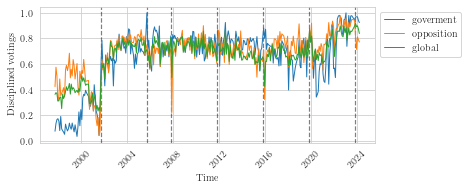

In [122]:
for begin in begins:
    plt.axvline(begin, 0, 17, alpha=0.5, c='black', ls='--', lw=1.2)
    
sns.lineplot(data=d[d['if_gov'] == True].sort_values('year_month'),
            x='year_month', y='discipline_votings', label='goverment', lw=1)
sns.lineplot(data=d[d['if_gov'] == False].sort_values('year_month'),
            x='year_month', y='discipline_votings', label='opposition', lw=1)

d_avg = df_discipline_votings.groupby(['year_month'], as_index=False)['discipline_votings'].mean()
sns.lineplot(data=d_avg.sort_values('year_month'),
            x='year_month', y='discipline_votings', label='global', dashes=True, lw=1)

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Disciplined votings')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

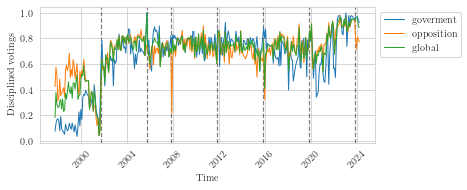

In [142]:
for begin in begins:
    plt.axvline(begin, 0, 17, alpha=0.5, c='black', ls='--', lw=1.2)
    
    
d = df_discipline_votings.groupby(['year_month', 'if_gov'], as_index=False)['discipline_votings'].median()
sns.lineplot(data=d[d['if_gov'] == True].sort_values('year_month'),
            x='year_month', y='discipline_votings', label='goverment', lw=1)
sns.lineplot(data=d[d['if_gov'] == False].sort_values('year_month'),
            x='year_month', y='discipline_votings', label='opposition', lw=1)

d_avg = df_discipline_votings.groupby(['year_month'], as_index=False)['discipline_votings'].median()
sns.lineplot(data=d_avg.sort_values('year_month'),
            x='year_month', y='discipline_votings', label='global', dashes=True, lw=1)

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Disciplined votings')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [24]:
df_gov

,k,period,gov
0,3,1997-10-01,"[AWS, UW]"
1,3,1997-11-01,"[AWS, UW]"
2,3,1997-12-01,"[AWS, UW]"
3,3,1998-01-01,"[AWS, UW]"
4,3,1998-02-01,"[AWS, UW]"
...,...,...,...
314,10,2023-12-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
315,10,2024-01-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
316,10,2024-02-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
317,10,2024-03-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"


In [29]:
df_gov['period'] = pd.to_datetime(df_gov['period'].str.replace('_', '-'), format='%Y-%m')
df_discipline['period'] = pd.to_datetime(df_discipline['year_month'], format='%Y-%m')

df_discipline = pd.merge(df_discipline, df_gov, on=['k', "period"])
# df_discipline

In [30]:
df_discipline

,k,year_month,club,vote_id,data_godzina,discipline,year,period,gov
0,3,1997-10-01,AWS,3001001,1997-10-20 12:51:54,0.995000,1997,1997-10-01,"[AWS, UW]"
1,3,1997-10-01,SLD,3001001,1997-10-20 12:51:54,0.974684,1997,1997-10-01,"[AWS, UW]"
2,3,1997-10-01,UW,3001001,1997-10-20 12:51:54,1.000000,1997,1997-10-01,"[AWS, UW]"
3,3,1997-10-01,PSL,3001001,1997-10-20 12:51:54,1.000000,1997,1997-10-01,"[AWS, UW]"
4,3,1997-10-01,ROP,3001001,1997-10-20 12:51:54,0.833333,1997,1997-10-01,"[AWS, UW]"
...,...,...,...,...,...,...,...,...,...
572259,10,2024-04-01,Kukiz15,10010026,2024-04-26 11:30:28,1.000000,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
572260,10,2024-04-01,Polska2050-TD,10010026,2024-04-26 11:30:28,1.000000,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
572261,10,2024-04-01,PSL-TD,10010026,2024-04-26 11:30:28,1.000000,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"
572262,10,2024-04-01,Konfederacja,10010026,2024-04-26 11:30:28,0.823529,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]"


In [31]:
if_gov = []
for ind in range(0, len(df_discipline)):
    club = df_discipline.iloc[ind, 2]
    gov = df_discipline.iloc[ind, 8]
    if_gov.append(club in gov)

df_discipline['if_gov'] = if_gov
df_discipline

,k,year_month,club,vote_id,data_godzina,discipline,year,period,gov,if_gov
0,3,1997-10-01,AWS,3001001,1997-10-20 12:51:54,0.995000,1997,1997-10-01,"[AWS, UW]",True
1,3,1997-10-01,SLD,3001001,1997-10-20 12:51:54,0.974684,1997,1997-10-01,"[AWS, UW]",False
2,3,1997-10-01,UW,3001001,1997-10-20 12:51:54,1.000000,1997,1997-10-01,"[AWS, UW]",True
3,3,1997-10-01,PSL,3001001,1997-10-20 12:51:54,1.000000,1997,1997-10-01,"[AWS, UW]",False
4,3,1997-10-01,ROP,3001001,1997-10-20 12:51:54,0.833333,1997,1997-10-01,"[AWS, UW]",False
...,...,...,...,...,...,...,...,...,...,...
572259,10,2024-04-01,Kukiz15,10010026,2024-04-26 11:30:28,1.000000,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",False
572260,10,2024-04-01,Polska2050-TD,10010026,2024-04-26 11:30:28,1.000000,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",True
572261,10,2024-04-01,PSL-TD,10010026,2024-04-26 11:30:28,1.000000,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",True
572262,10,2024-04-01,Konfederacja,10010026,2024-04-26 11:30:28,0.823529,2024,2024-04-01,"[KO, Lewica, Polska2050-TD, PSL-TD]",False


In [35]:
df_mean[df_mean['if_gov'] == True].mean()

<ipython-input-35-f322057428a3>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_mean[df_mean['if_gov'] == True].mean()


k             6.142857
if_gov        1.000000
discipline    0.972981
dtype: float64

In [36]:
df_mean[df_mean['if_gov'] == False].mean()

<ipython-input-36-02127650ca39>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_mean[df_mean['if_gov'] == False].mean()


k             6.142857
if_gov        0.000000
discipline    0.934738
dtype: float64

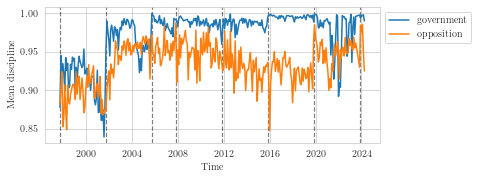

In [34]:
for begin in begins:
    plt.axvline(begin, 0, 17, alpha=0.5, c='black', ls='--', lw=1.2)

df_mean = df_discipline.groupby(['k', 'year_month', 'if_gov'], as_index=False)['discipline'].mean()
df_mean['year_month'] = pd.to_datetime(df_mean['year_month'], format='%Y-%m')

sns.lineplot(df_mean[df_mean['if_gov'] == True], x="year_month", y="discipline", label='government')
sns.lineplot(df_mean[df_mean['if_gov'] == False], x="year_month", y="discipline", label='opposition')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Mean discipline')
plt.show()

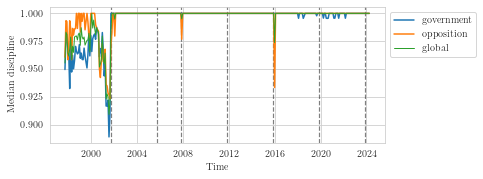

In [144]:
for begin in begins:
    plt.axvline(begin, 0, 17, alpha=0.5, c='black', ls='--', lw=1.2)

df_mean = df_discipline.groupby(['k', 'year_month', 'if_gov'], as_index=False)['discipline'].median()
df_mean['year_month'] = pd.to_datetime(df_mean['year_month'], format='%Y-%m')

sns.lineplot(df_mean[df_mean['if_gov'] == True], x="year_month", y="discipline", label='government')
sns.lineplot(df_mean[df_mean['if_gov'] == False], x="year_month", y="discipline", label='opposition')

d_avg = df_discipline.groupby(['year_month'], as_index=False)['discipline'].median()
sns.lineplot(data=d_avg.sort_values('year_month'),
            x='year_month', y='discipline', label='global', dashes=True, lw=1)


plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Median discipline')
plt.show()

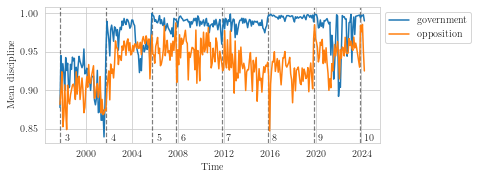

In [198]:
for i in range(len(begins)):
    plt.axvline(begins[i], 0, 1, alpha=0.5, c='black', ls='--', lw=1.2)
    plt.annotate(str(i+3), (begins[i]+np.timedelta64(150,'D'), 0.834))

df_mean = df_discipline.groupby(['k', 'year_month', 'if_gov'], as_index=False)['discipline'].mean()
df_mean['year_month'] = pd.to_datetime(df_mean['year_month'], format='%Y-%m')

sns.lineplot(df_mean[df_mean['if_gov'] == True], x="year_month", y="discipline", label='government')
sns.lineplot(df_mean[df_mean['if_gov'] == False], x="year_month", y="discipline", label='opposition')

# d_avg = df_discipline.groupby(['year_month'], as_index=False)['discipline'].mean()
# sns.scatterplot(data=d_avg.sort_values('year_month'),
#             x='year_month', y='discipline', label='global', s=4, color='black', alpha=0.8)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Mean discipline')
plt.savefig('images/measures_in_time/discipline_gov_opp.pdf', bbox_inches='tight')
plt.show()

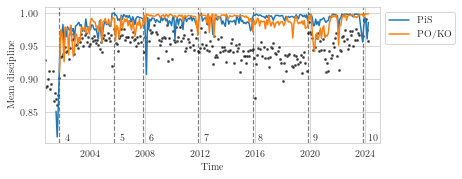

In [206]:
for i in range(len(begins)):
    plt.axvline(begins[i], 0, 1, alpha=0.5, c='black', ls='--', lw=1.2)
    plt.annotate(str(i+3), (begins[i]+np.timedelta64(150,'D'), 0.807))

df_mean = df_discipline.groupby(['k', 'year_month', 'club'], as_index=False)['discipline'].mean()
df_mean['year_month'] = pd.to_datetime(df_mean['year_month'], format='%Y-%m')

sns.lineplot(df_mean[df_mean['club'] == 'PiS'], x="year_month", y="discipline", label='PiS')
sns.lineplot(df_mean[df_mean['club'].isin(['PO', 'PO-KO', 'KO'])], x="year_month", y="discipline", label='PO/KO')

d_avg = df_discipline.groupby(['year_month'], as_index=False)['discipline'].mean()
sns.scatterplot(data=d_avg.sort_values('year_month'),
            x='year_month', y='discipline', s=8, color='black', alpha=0.8)

plt.xlim(df_mean[df_mean['club'] == 'PiS']['year_month'].min() - np.timedelta64(300,'D'), 
         df_mean[df_mean['club'] == 'PiS']['year_month'].max() + np.timedelta64(300,'D'))
plt.xlabel('Time')
plt.ylabel('Mean discipline')
plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim()
plt.savefig('images/measures_in_time/discipline_po_pis.pdf', bbox_inches='tight')
plt.show()


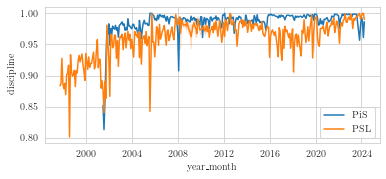

In [158]:
sns.lineplot(df_mean[df_mean['club'] == 'PiS'], x="year_month", y="discipline", label='PiS')
sns.lineplot(df_mean[df_mean['club'].isin(['PSL', 'PSL-UED', 'PSL-KP', 'Lewica'])], x="year_month", y="discipline", label='PSL')
plt.show()